<a href="https://colab.research.google.com/github/ebtisamasiri/T5-Data-Science-AI-Practice/blob/main/Week%201/Task_(2)_Week_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objective
* The objective of this exercise is to explore and visualize the Traffic Index dataset to gain insights and understand the patterns in the data.

##Dataset Description

| Column Name | Description | Data Type |
| :---------------- | :------: | ----: |
|   City  |   Name of the city	   | Object |
| Datetime           |   Date and time of the data entry	   | Object |
|  TrafficIndexLive    |  Real-time traffic index	   | Int |
|  Jamscount |  Number of traffic jams	   | Int |
|   JamsDelay  |   Total delay caused by traffic jams (in minutes)	   | Float |
|JamsLength           |   Total length of traffic jams (in kilometers)	   | Float |
|  TrafficIndexWeekAgo    |  Traffic index one week ago	   | Int |
|  TravelTimeHistoric |  Historical average travel time (in minutes)	   | Float |
|   TravelTimeLive  |   Real-time travel time (in minutes)	   | Float |


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/Task (2) Dataset.csv')

# Tasks

## 1. Exploratory Data Analysis (EDA)

### Perform summary statistics on the dataset.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66639 entries, 0 to 66638
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   City                 66639 non-null  object 
 1   Datetime             66639 non-null  object 
 2   TrafficIndexLive     66639 non-null  int64  
 3   JamsCount            66639 non-null  int64  
 4   JamsDelay            66639 non-null  float64
 5   JamsLength           66639 non-null  float64
 6   TrafficIndexWeekAgo  66639 non-null  int64  
 7   TravelTimeHistoric   62772 non-null  float64
 8   TravelTimeLive       62772 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 4.6+ MB


In [6]:
df.head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
0,Abudhabi,2023-07-07 08:01:30,6,4,15.6,0.7,13,59.611918,54.803617
1,Abudhabi,2023-07-07 09:01:30,7,7,20.5,1.7,8,60.221387,56.118629
2,Abudhabi,2023-07-07 10:46:30,7,8,25.0,2.8,6,59.161978,55.518834
3,Abudhabi,2023-07-07 11:16:30,8,11,30.6,5.5,6,59.738138,56.413917
4,Abudhabi,2023-07-07 12:01:30,8,20,62.1,6.5,5,58.958314,56.059246


In [7]:
df.tail()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
66634,Riyadh,2023-12-15 03:01:30,8,33,127.8,20.4,8,63.926569,63.245473
66635,Riyadh,2023-12-15 04:31:30,6,27,87.0,13.8,5,59.182641,60.012955
66636,Riyadh,2023-12-15 05:01:30,3,17,49.8,6.7,1,57.746816,57.561438
66637,Riyadh,2023-12-15 06:01:30,0,16,61.3,4.3,0,56.535277,55.463218
66638,Riyadh,2023-12-15 07:01:30,0,15,39.5,5.2,0,56.126417,54.886055


In [9]:
df.sample(3)

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
56815,Medina,2023-10-29 04:46:30,18,2,11.5,1.0,0,66.850270,76.837112
30590,Dubai,2023-02-21 21:01:30,29,226,860.7,109.7,33,68.366081,71.362410
47135,Kuwait,2023-08-08 20:01:30,18,94,300.4,38.2,22,67.245545,66.752456


In [10]:
df.isnull().sum()

,0
City,0
Datetime,0
TrafficIndexLive,0
JamsCount,0
JamsDelay,0
JamsLength,0
TrafficIndexWeekAgo,0
TravelTimeHistoric,3867
TravelTimeLive,3867


In [11]:
df[['City']].value_counts()

,count
City,
Doha,8692
Riyadh,8692
Kuwait,8691
Cairo,8690
Dubai,8690
Abudhabi,3864
Al-ain,3864
Dammam,3864
Jeddah,3864


In [13]:
df.sort_values('JamsCount', ascending=False).head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
36473,Dubai,2023-10-26 18:31:00,138,1359,9989.4,1171.1,70,77.218820,133.372646
36472,Dubai,2023-10-26 17:46:00,115,1292,9400.3,1173.9,56,73.680174,120.189364
36474,Dubai,2023-10-26 19:01:00,136,1107,8645.1,986.8,71,77.978795,132.397426
29987,Dubai,2023-01-27 18:46:00,104,941,5598.5,852.7,46,69.775905,109.365358
29988,Dubai,2023-01-27 19:01:30,106,938,5622.9,834.1,49,70.080622,110.847281


In [14]:
df.sort_values('JamsLength', ascending=False).head()

,City,Datetime,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
36472,Dubai,2023-10-26 17:46:00,115,1292,9400.3,1173.9,56,73.680174,120.189364
36473,Dubai,2023-10-26 18:31:00,138,1359,9989.4,1171.1,70,77.218820,133.372646
36474,Dubai,2023-10-26 19:01:00,136,1107,8645.1,986.8,71,77.978795,132.397426
60088,Riyadh,2023-03-15 17:31:00,98,883,5379.8,932.9,57,87.711184,130.973104
29987,Dubai,2023-01-27 18:46:00,104,941,5598.5,852.7,46,69.775905,109.365358


### Identify and analyze patterns in the data.

In [15]:
df.select_dtypes(include=['number']).corr()

,TrafficIndexLive,JamsCount,JamsDelay,JamsLength,TrafficIndexWeekAgo,TravelTimeHistoric,TravelTimeLive
TrafficIndexLive,1.000000,0.876216,0.861349,0.866799,0.903282,0.331072,0.642326
JamsCount,0.876216,1.000000,0.982459,0.952762,0.806545,0.305166,0.566874
JamsDelay,0.861349,0.982459,1.000000,0.962679,0.775028,0.303733,0.571188
JamsLength,0.866799,0.952762,0.962679,1.000000,0.787548,0.306312,0.569065
TrafficIndexWeekAgo,0.903282,0.806545,0.775028,0.787548,1.000000,0.327349,0.573365
TravelTimeHistoric,0.331072,0.305166,0.303733,0.306312,0.327349,1.000000,0.892562
TravelTimeLive,0.642326,0.566874,0.571188,0.569065,0.573365,0.892562,1.000000


<Axes: ylabel='Frequency'>

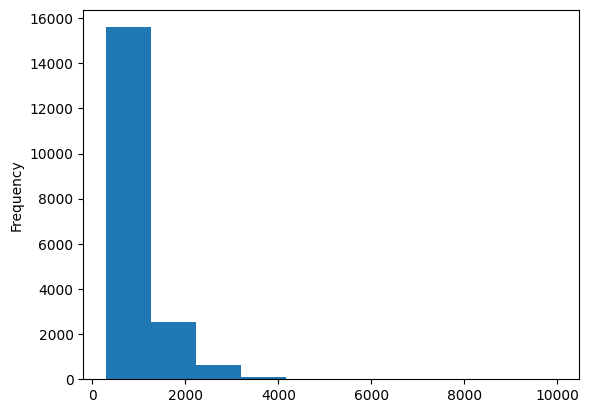

In [17]:
df[df['JamsDelay'] > 288]['JamsDelay'].plot.hist()

<Axes: ylabel='Frequency'>

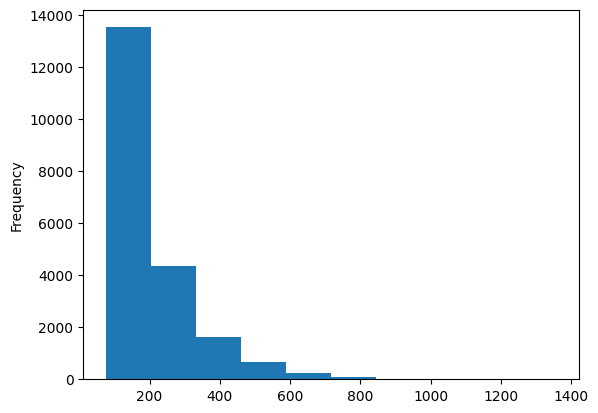

In [18]:
df[df['JamsCount'] > 74]['JamsCount'].plot.hist()

### Visualize the distribution of key variables (e.g., Traffic_Index, Date).

<Axes: >

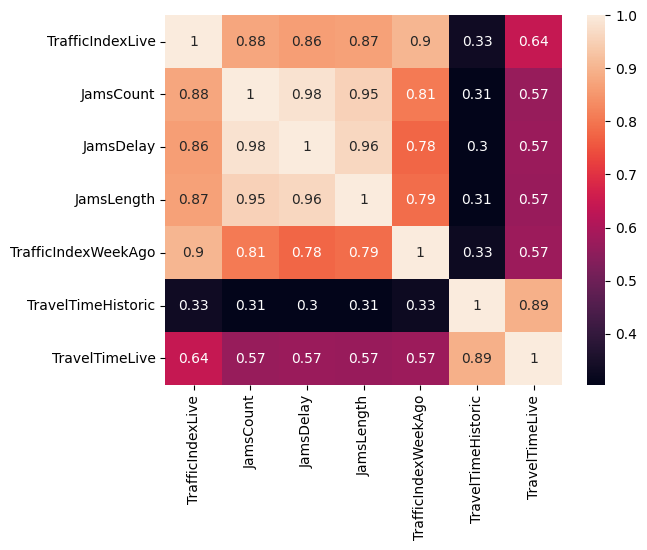

In [21]:
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True)

<Axes: xlabel='JamsCount', ylabel='TrafficIndexLive'>

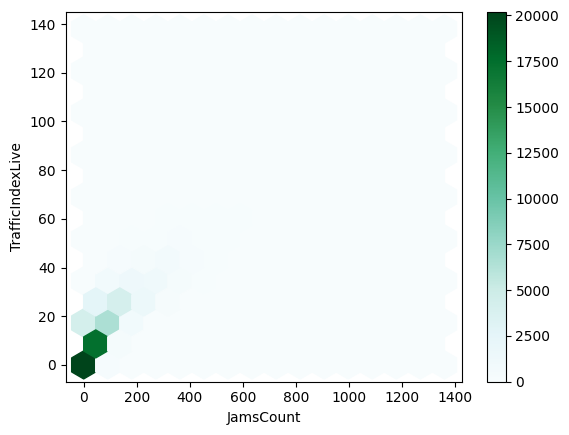

In [19]:
df.plot.hexbin(x = 'JamsCount' , y = 'TrafficIndexLive', gridsize = 15)

<Axes: >

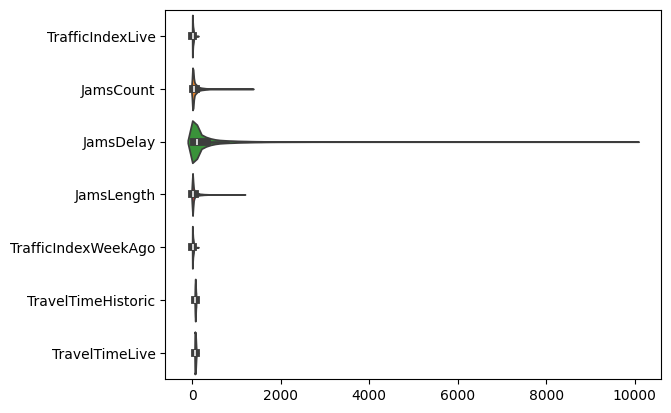

In [22]:
sns.violinplot(data = df, orient = 'h')

### Explore relationships between variables (e.g., Traffic_Index vs. Weather_Condition).


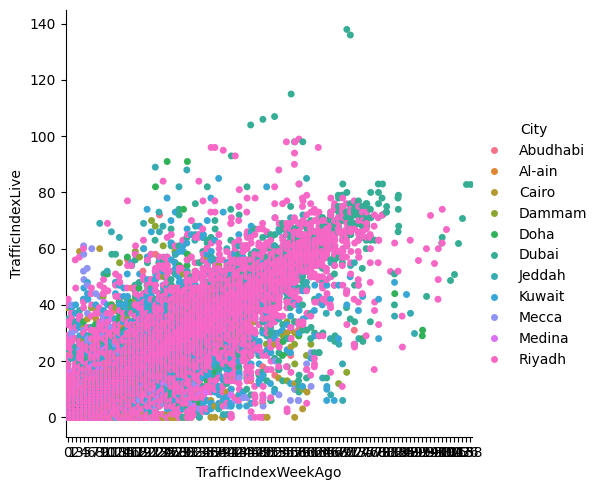

In [25]:
sns.catplot(data=df, x="TrafficIndexWeekAgo", y="TrafficIndexLive", hue="City")

## 2. Data Visualization

* Ensure the visualizations are clear and informative.

### Create visualizations to illustrate the findings from the EDA.


<Axes: ylabel='TrafficIndexLive'>

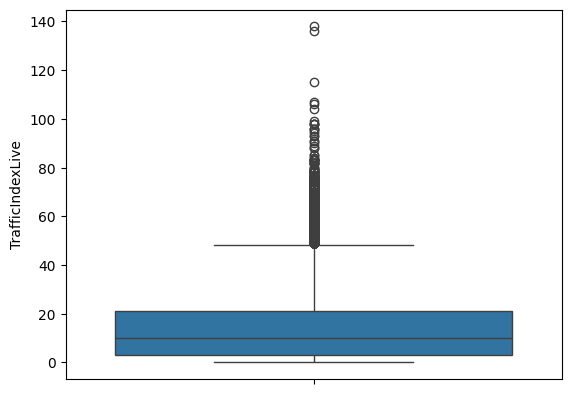

In [26]:
sns.boxplot(df['TrafficIndexLive'])

### Use appropriate plots such as histograms, bar charts, pie charts, scatter plots, and heatmaps.

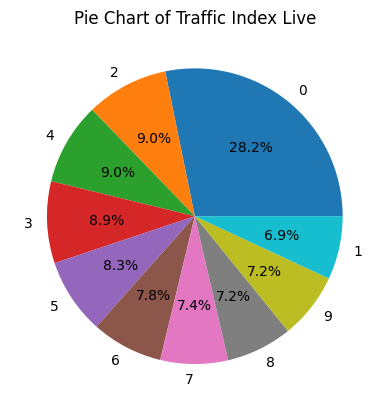

In [28]:
df['TrafficIndexLive'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%')
plt.title('Pie Chart of Traffic Index Live')
plt.ylabel('')
plt.show()

## 3. Insights and Conclusions

* <h3>Summarize the key insights gained from the data analysis.<h3/>
* <h3>Draw conclusions based on the patterns observed in the data.<h3/>